## PROJECT: Analize a dataset; Red wine quality and White wine quality

## Table of Contents
### 1. Assessing Data
### 2. Data Cleaning
### 3. Exploratory with visuals
### 5. Conclusions


## Introduction: 
#### this dataset collects information from 100k medical appointment in brazil and focused on the question of whether or not the patients show up for their appointment. A number of characteristics about the patient are included in each row.
#### The no show dataset contains of 14 features(columns) and 110527 record(rows). The data is records for schedule the clinic.

## Question(s) for Analysis
### 1. How are the features effecting on NO-show ?
### 2. how are the diagnosis and the no_show related with each other?

In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn

#stats
from scipy import stats

#plotting
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Assessing Data 

In [2]:
df = pd.read_csv("/Users/user/Downloads/noshowappointments-kagglev2-may-2016.csv")
df.head(11)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [3]:
#checking thr shape of the DataFrame

df.shape

(110527, 14)

In [4]:
#checking the data types

print(df.dtypes)

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


In [5]:
#checking the columns

df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

## checking for miss values

In [6]:
#checking the null values

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
#checking for duplicates

df.duplicated().sum()

0

## descriptive statistical analysis

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
df.describe(include = ["object"])

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


In [10]:
# list the unique values for every column
for x in df.columns:
    print(x,' ' ,df[x].nunique()," ",df[x].unique(),'\n')

PatientId   62299   [2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13] 

AppointmentID   110527   [5642903 5642503 5642549 ... 5630692 5630323 5629448] 

Gender   2   ['F' 'M'] 

ScheduledDay   103549   ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z'] 

AppointmentDay   27   ['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z

In [11]:
#finding the unique value for all the columns

for x in df.columns:
    print(x,' ' ,df[x].nunique()," ",df[x].unique(),'\n')

PatientId   62299   [2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13] 

AppointmentID   110527   [5642903 5642503 5642549 ... 5630692 5630323 5629448] 

Gender   2   ['F' 'M'] 

ScheduledDay   103549   ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z'] 

AppointmentDay   27   ['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z

In [12]:
df.query("Age == 115")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


## DATA CLEANING

#### I change every dash- to underscore_ on my DataFrame 
#### I have also replaced all uppercase with lowercase
#### for easy reading and stress free analysis

In [13]:
df.columns = df.columns.str.lower().str.replace("-","_")

categorical_columns = list(df.dtypes[df.dtypes == "object"].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(" ","_")
    
#df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

#### dropping patientid and appointmentid because they aren't necessary in the analysis


In [14]:

df = df.drop(["patientid", "appointmentid"], axis = 1)

In [15]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,f,2016-04-29t18:38:08z,2016-04-29t00:00:00z,62,jardim_da_penha,0,1,0,0,0,0,no
1,m,2016-04-29t16:08:27z,2016-04-29t00:00:00z,56,jardim_da_penha,0,0,0,0,0,0,no
2,f,2016-04-29t16:19:04z,2016-04-29t00:00:00z,62,mata_da_praia,0,0,0,0,0,0,no
3,f,2016-04-29t17:29:31z,2016-04-29t00:00:00z,8,pontal_de_camburi,0,0,0,0,0,0,no
4,f,2016-04-29t16:07:23z,2016-04-29t00:00:00z,56,jardim_da_penha,0,1,1,0,0,0,no


#### while going through the dataset, i discovered and unusual age of -1, so i dropped it as part of my data cleaning. since it was just one row, it will not affect our data analysis

In [16]:
df.query("age == -1")

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,f,2016-06-06t08:58:13z,2016-06-06t00:00:00z,-1,romão,0,0,0,0,0,0,no


In [17]:
df = df.drop([99832])

In [18]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Exploring with Visuals

In [19]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,f,2016-04-29t18:38:08z,2016-04-29t00:00:00z,62,jardim_da_penha,0,1,0,0,0,0,no
1,m,2016-04-29t16:08:27z,2016-04-29t00:00:00z,56,jardim_da_penha,0,0,0,0,0,0,no
2,f,2016-04-29t16:19:04z,2016-04-29t00:00:00z,62,mata_da_praia,0,0,0,0,0,0,no
3,f,2016-04-29t17:29:31z,2016-04-29t00:00:00z,8,pontal_de_camburi,0,0,0,0,0,0,no
4,f,2016-04-29t16:07:23z,2016-04-29t00:00:00z,56,jardim_da_penha,0,1,1,0,0,0,no


In [20]:
df.corr()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633
scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192
hipertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270
diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552
alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149
handcap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162
sms_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000


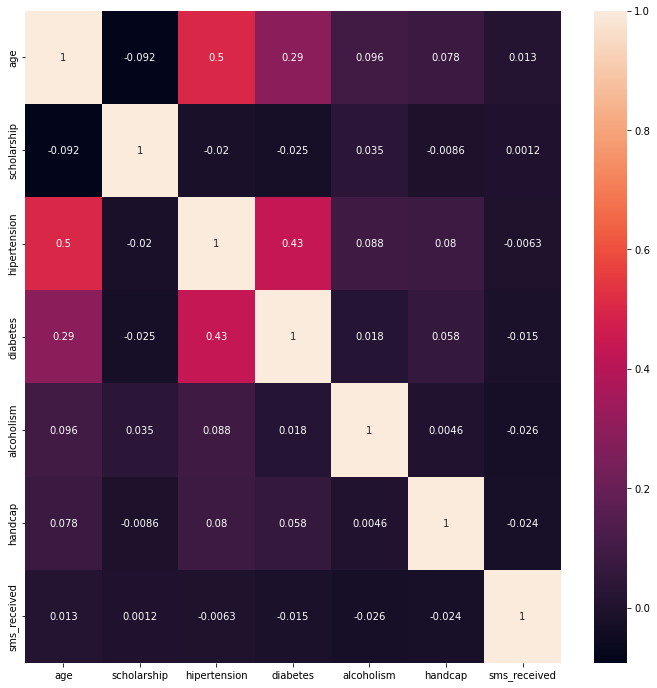

In [21]:
#creating a pictoral representation of the abo
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(),annot=True,cmap="rocket")
plt.show()

#### plotting a histogram of all the columns in the dataset to see their various distributions and from this you'll know that most of the features of the dataset at either 0 or 1. only age is continous

Text(0.5, 1.0, 'dataframe visualization')

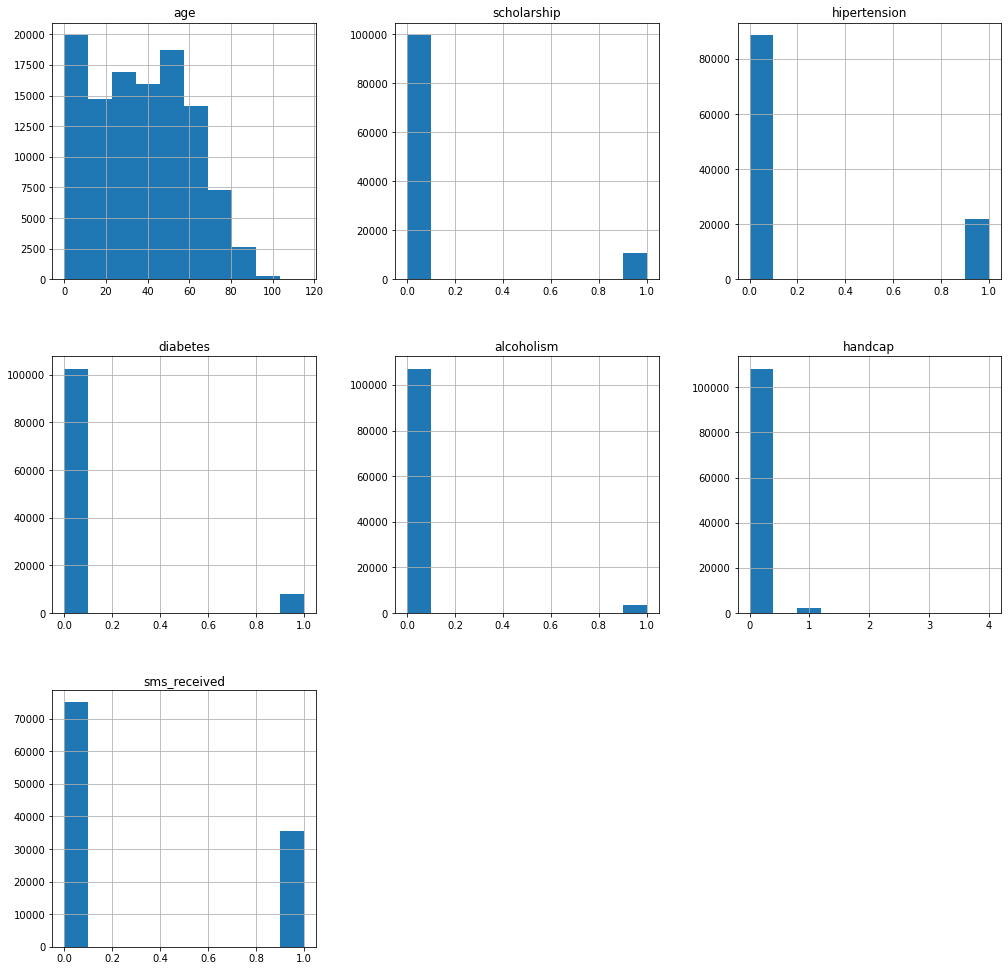

In [22]:
df.hist(figsize = (17,17));
plt.title('dataframe visualization')

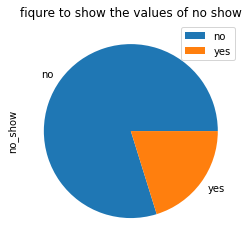

In [23]:
df["no_show"].value_counts().plot.pie()
plt.title('fiqure to show the values of no show')
plt.legend()

In [24]:
df["gender"].value_counts()

f    71839
m    38687
Name: gender, dtype: int64

#### I discovered that they are more females than males after checking the value_counts

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


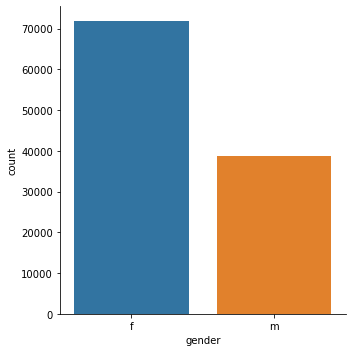

In [25]:
sns.catplot("gender", data = df, kind = "count")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


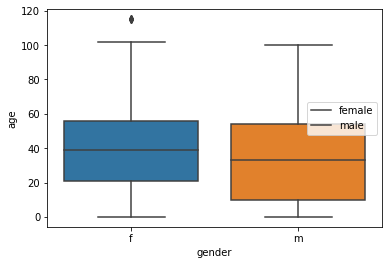

In [26]:
sns.boxplot('gender', 'age', data = df)
plt.legend(labels = ["female", "male"])

## (1) How are the features effecting on NO-show 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


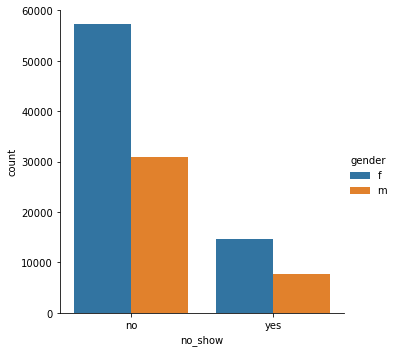

In [27]:
sns.factorplot("no_show", hue = "gender", data = df, kind = "count")

### this shows that more females showed up for their appointment that males

In [28]:
df["neighbourhood"].unique()

array(['jardim_da_penha', 'mata_da_praia', 'pontal_de_camburi',
       'república', 'goiabeiras', 'andorinhas', 'conquista',
       'nova_palestina', 'da_penha', 'tabuazeiro', 'bento_ferreira',
       'são_pedro', 'santa_martha', 'são_cristóvão', 'maruípe',
       'grande_vitória', 'são_benedito', 'ilha_das_caieiras',
       'santo_andré', 'solon_borges', 'bonfim', 'jardim_camburi',
       'maria_ortiz', 'jabour', 'antônio_honório', 'resistência',
       'ilha_de_santa_maria', 'jucutuquara', 'monte_belo',
       'mário_cypreste', 'santo_antônio', 'bela_vista', 'praia_do_suá',
       'santa_helena', 'itararé', 'inhanguetá', 'universitário',
       'são_josé', 'redenção', 'santa_clara', 'centro', 'parque_moscoso',
       'do_moscoso', 'santos_dumont', 'caratoíra', 'ariovaldo_favalessa',
       'ilha_do_frade', 'gurigica', 'joana_d´arc', 'consolação',
       'praia_do_canto', 'boa_vista', 'morada_de_camburi', 'santa_luíza',
       'santa_lúcia', 'barro_vermelho', 'estrelinha', 'forte_são_

In [29]:
df["neighbourhood"].value_counts()

jardim_camburi                 7717
maria_ortiz                    5805
resistência                    4431
jardim_da_penha                3877
itararé                        3514
                               ... 
ilha_do_boi                      35
ilha_do_frade                    10
aeroporto                         8
ilhas_oceânicas_de_trindade       2
parque_industrial                 1
Name: neighbourhood, Length: 81, dtype: int64

## Does age affect no_show

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


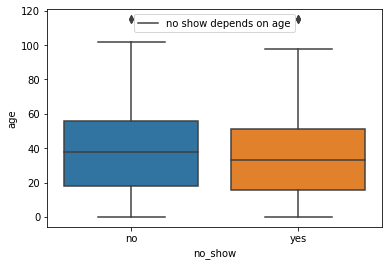

In [30]:
sns.boxplot("no_show", "age", data = df)
plt.legend(labels = ["no show depends on age"])

In [31]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,f,2016-04-29t18:38:08z,2016-04-29t00:00:00z,62,jardim_da_penha,0,1,0,0,0,0,no
1,m,2016-04-29t16:08:27z,2016-04-29t00:00:00z,56,jardim_da_penha,0,0,0,0,0,0,no
2,f,2016-04-29t16:19:04z,2016-04-29t00:00:00z,62,mata_da_praia,0,0,0,0,0,0,no
3,f,2016-04-29t17:29:31z,2016-04-29t00:00:00z,8,pontal_de_camburi,0,0,0,0,0,0,no
4,f,2016-04-29t16:07:23z,2016-04-29t00:00:00z,56,jardim_da_penha,0,1,1,0,0,0,no


/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


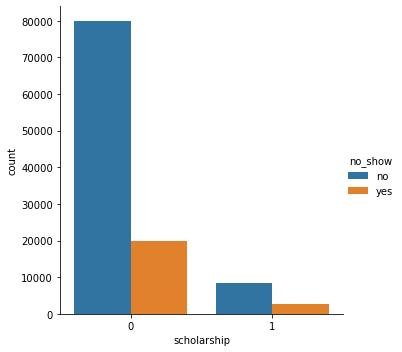

In [32]:
sns.factorplot("scholarship", data = df, hue = "no_show", kind = "count")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


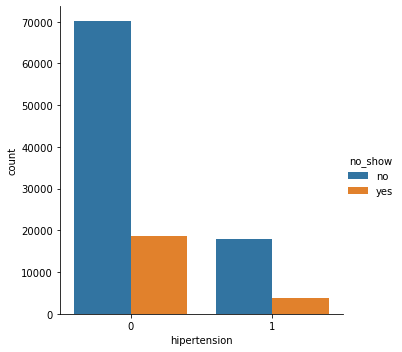

In [33]:
sns.factorplot("hipertension", data = df, hue = "no_show", kind = "count")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


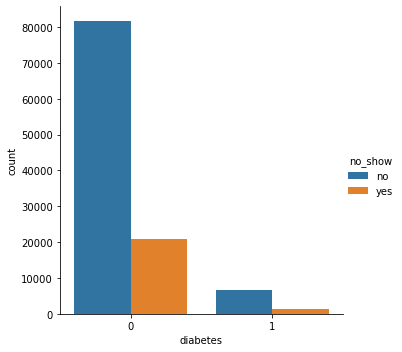

In [34]:
sns.factorplot("diabetes", data = df, hue = "no_show", kind = "count")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


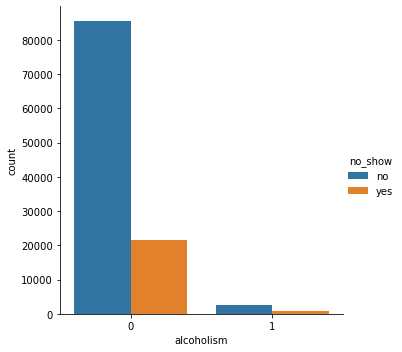

In [35]:
sns.factorplot("alcoholism", data = df, hue = "no_show", kind = "count")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


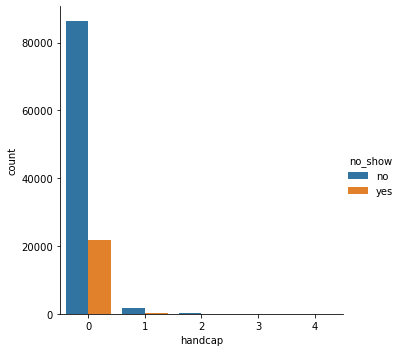

In [36]:
sns.factorplot("handcap", data = df, hue = "no_show", kind = "count")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


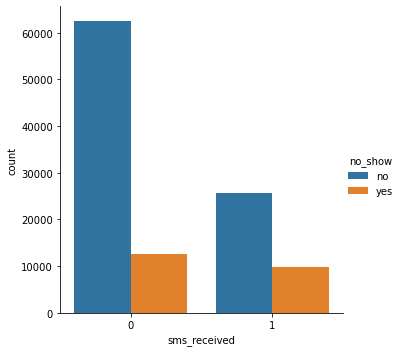

In [37]:
sns.factorplot("sms_received", data = df, hue = "no_show", kind = "count")

## (2) how are the diagnosis and the no_show related with each other?

<AxesSubplot:xlabel='hipertension,diabetes,alcoholism,handcap,no_show'>

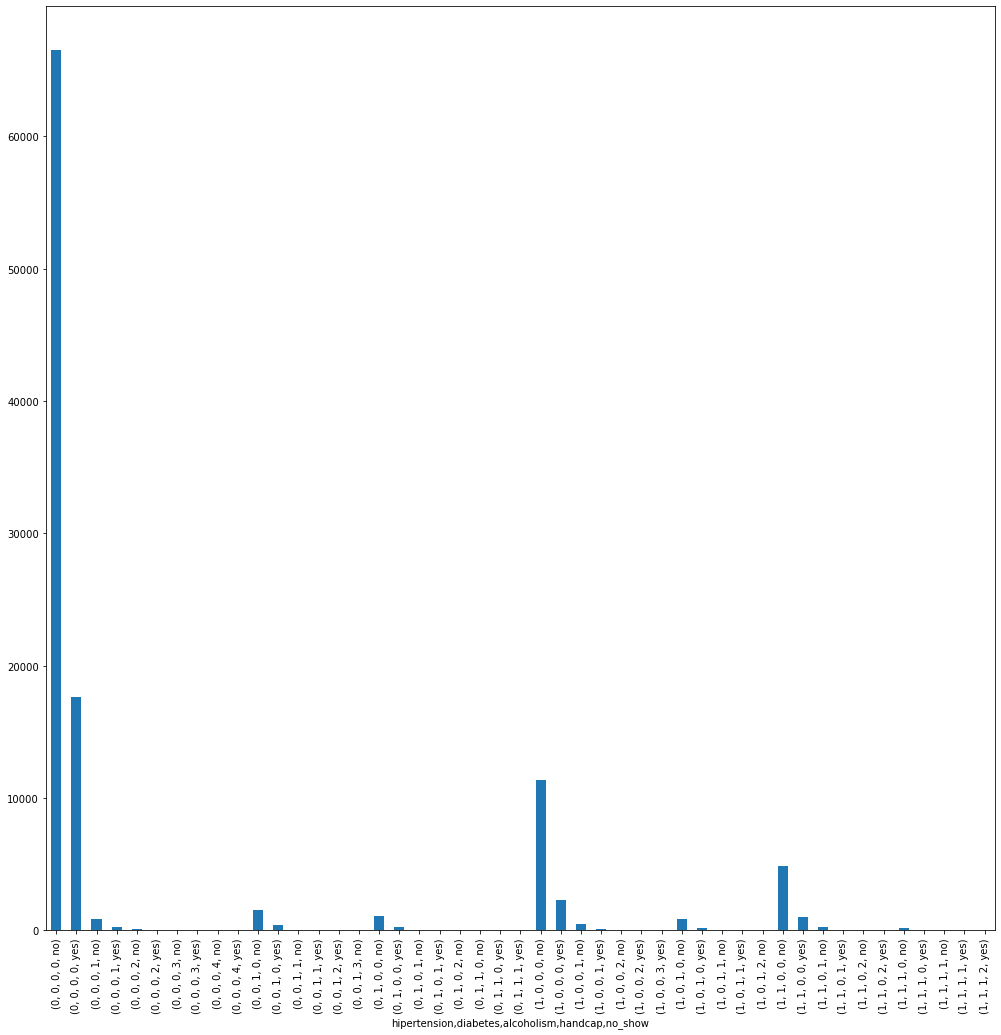

In [38]:
df.groupby(['hipertension','diabetes','alcoholism',
            'handcap']).no_show.value_counts().plot(kind = "bar",figsize=(17, 17))


<AxesSubplot:xlabel='hipertension,diabetes,alcoholism,handcap,no_show'>

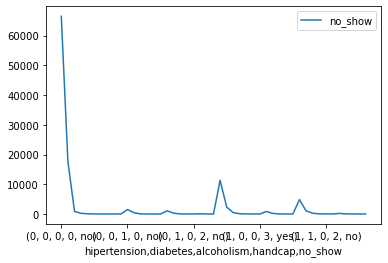

In [39]:
df.groupby(['hipertension','diabetes','alcoholism','handcap']).no_show.value_counts().plot(legend=True)

#### From the graph and the table, we can see that most showing patients with no diagnosis

In [40]:
df["diabetes"].unique()

array([0, 1])

In [41]:
df["diabetes"].unique()

array([0, 1])

In [42]:
df["diabetes"].unique()

array([0, 1])

In [43]:
df["handcap"].unique()

array([0, 1, 2, 3, 4])

In [44]:
df["alcoholism"].unique()

array([0, 1])

In [45]:
k=df.groupby(['hipertension','diabetes','alcoholism','handcap'])['no_show']
k.describe()

count unique  top   freq
hipertension diabetes alcoholism handcap                          
0            0        0          0        84114      2   no  66511
                                 1         1088      2   no    869
                                 2           97      2   no     84
                                 3            9      2   no      7
                                 4            3      2   no      2
                      1          0         1922      2   no   1506
                                 1           31      2   no     28
                                 2            1      1  yes      1
                                 3            3      1   no      3
             1        0          0         1341      2   no   1068
                                 1           39      2   no     36
                                 2            1      1   no      1
                      1          0           75      2   no     63
                                 1            1      1  yes      1
1            0        0          0        13663      2   no  11338
                                 1          541      2   no    449
                                 2           39      2   no     24
                                 3            1      1  yes      1
                      1          0         1042      2   no    845
                                 1           26      2   no     25
                                 2            3      1   no      3
             1        0          0         5885      2   no   4841
                                 1          304      2   no    260
                                 2           41      2   no     34
                      1          0          243      2   no    201
                                 1           12      2   no      9
                                 2            1      1  yes      1

### Conclusions
#### starting with Data Wrangling: loading the data, check for the cleanliness.

#### The no show dataset contains of 14 features(columns) and 110527 record(rows). 
#### The data is records for schedule the clinic.

#### then Data Cleaning 
#### 1) negative age
#### 2) dropping patientid and appointmentid
#### 3) rename the columns

### Limitations

#### they were more females than male, meaning majority of the results favoured the female class more 
